# Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading the training dataset

For demonstration purposes, let us take a 2 dimensional dataset with two features (Feature_1 and Feature_2) and consisting of two classes (Class A and Class B) having a distribution specifications as follows:

**Class A:** The Class A is centred around the mean of (1,1) and has the covariance matrix [[1,-0.2],[-0.2,1]]

**Class B:** The Class B is centred around the mean of (3,4) and has the covariance matrix [[1,0.1],[0.1,1]]

Defintions: 

**Mean:** A Class with centre (x1, x2) as mean denotes that the average value along "Feature_1" is x1 and the average value along "Feature_2" is x2

P.S: Since we would like to ensure that the outputs corrosponds to the desired output, we will also add the seed value of 42 while generating these distributions.



In [2]:
mean_01=np.array([1,1])
cov_01=np.array([[1,-0.2],[-0.2,1]])
mean_02=np.array([3,4])
cov_02=np.array([[1,0.1],[0.1,1]])
np.random.seed(42)
data_01=np.random.multivariate_normal(mean_01,cov_01,500, check_valid= "warn")
data_02=np.random.multivariate_normal(mean_02,cov_02,500, check_valid= "warn")
data = np.vstack((data_01,data_02))
df_train = pd.DataFrame(data, columns = ["Feature_1", "Feature_2"])
df_train["class"] = [0]*500 + [1]*500 

# Visualising the dataset

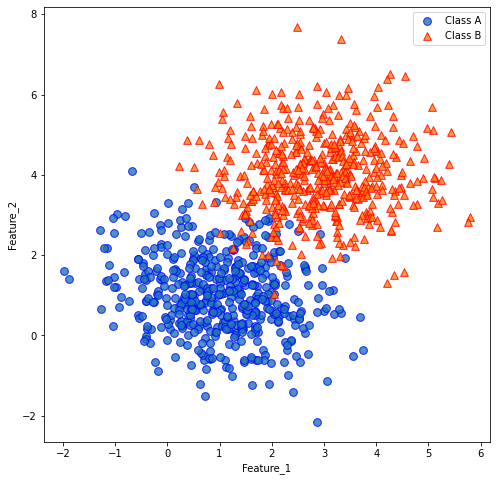

In [3]:
## For Contributing, refer to expectedoutput1.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(df_train["Feature_1"][:500],df_train["Feature_2"][:500], label="Class A", edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(df_train["Feature_1"][500:],df_train["Feature_2"][500:], label="Class B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
plt.legend()
plt.show()

# Machine Learning Model

## Preparing training and test sets

In [4]:
X = df_train[["Feature_1","Feature_2"]]
Y = df_train[["class"]]
X = np.hstack((np.ones((1000,1)),X.to_numpy()))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.to_numpy(), test_size=0.2, random_state=42)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(800, 3) (800, 1) (200, 3) (200, 1)


## Defining the model

In [5]:
def hypothesis(x,theta):
    sigmoid=(1.0/(1.0 + np.exp(-1.0*np.dot(x,theta))))
    return(sigmoid)

def error(X,Y,theta):
    m=X.shape[0]
    err=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        err+=Y[i]*np.log2(hx) + (1-Y[i])*np.log2(1-hx)
    err /=m
    return(-err)

def gradient(X,Y,theta):
    grad=np.zeros((X.shape[1]))
    m=X.shape[0]
    fea=X.shape[1]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        for j in range(fea):
            grad[j]+=(hx-Y[i])*X[i,j]
    grad=grad/m
    return(grad)
    
def gradient_ascent(X,Y,learning_rate=0.5):
    theta=2*np.random.random(X.shape[1])
    theta[0]=0
    error_list=[]
    acc_list=[]
    theta_list = []
    for i in range(100):
        grad=gradient(X,Y,theta)
        err=error(X,Y,theta)
        error_list.append(err)
        theta_list.append(theta)
        acc_list.append(accuracy(X,Y,theta))
        for j in range(X.shape[1]):
            theta[j]-=learning_rate*grad[j]
    return(theta, theta_list, error_list,acc_list)

def predict(x,theta):
    p=hypothesis(x,theta)
    if p<0.5:
        return 0
    else:
        return 1

def accuracy(X,Y,theta):
    y_pred=[]
    for i in range(X.shape[0]):
        p=predict(X[i],theta)
        y_pred.append(p)
    y_pred=np.array(y_pred)
    y_pred=y_pred.reshape((-1,1))
    return(Y==y_pred).sum()/X.shape[0]

## Training the model

In [6]:
theta, theta_list,error_list,acc_list=gradient_ascent(X_train,Y_train)

## Visualising Error over training set

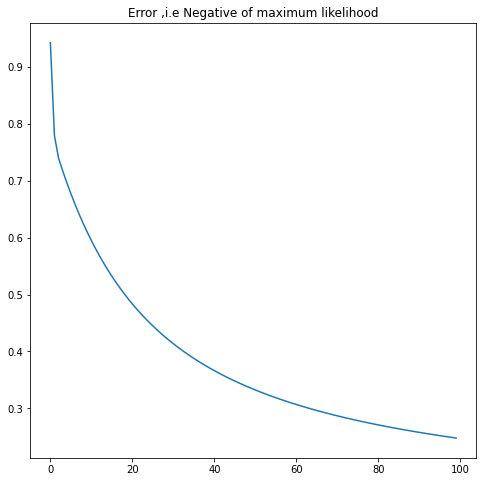

In [7]:
## For Contributing, refer to expectedoutput2.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.plot(error_list)
plt.title("Error ,i.e Negative of maximum likelihood")
plt.show()

## Visalising accuracy over test set

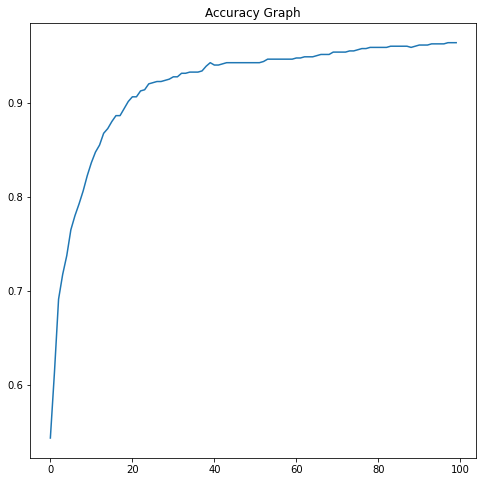

In [8]:
## For Contributing, refer to expectedoutput3.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.plot(acc_list)
plt.title("Accuracy Graph")
plt.show()
acc=accuracy(X_test,Y_test,theta)

In [9]:
print("The accuracy for the algorithm is:",acc)
print("The final theta parameters calculated are:",theta)

The accuracy for the algorithm is: 0.975
The final theta parameters calculated are: [-3.8480557   0.60018874  1.22204899]


## Visualising the decision boundry over iterations

In [ ]:
## For Contributing, refer to expectedoutput4.html in the expected outputs folder.


# Plotting the decision boundry

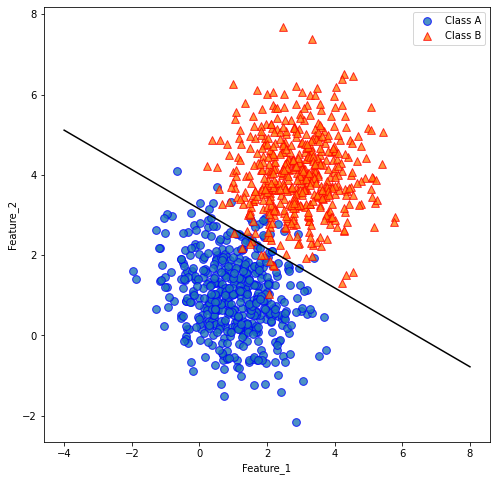

In [10]:
## For Contributing, refer to expectedoutput5.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(df_train["Feature_1"][:500],df_train["Feature_2"][:500], label="Class A", edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(df_train["Feature_1"][500:],df_train["Feature_2"][500:], label="Class B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
x=np.linspace(-4,8,15)
y=-1*(theta[0]+x*theta[1])/theta[2]
plt.plot(x,y,color='black')
plt.legend()
plt.show()